In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [30]:
data = pd.read_csv("ZHVI.csv")
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30
0,102001,0,United States,Country,NaN,128160.0,128506.0,128871.0,129614.0,130362.0,...,300860.0,306296.0,310955.0,315082.0,318996.0,323361.0,328095.0,333313.0,338585.0,344141.0
1,394913,1,"New York, NY",Msa,NY,225180.0,226526.0,227736.0,230120.0,232338.0,...,553205.0,560830.0,566755.0,571322.0,574889.0,578138.0,582110.0,586761.0,593206.0,600354.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,232463.0,233273.0,234512.0,236869.0,239397.0,...,828517.0,842036.0,851198.0,855983.0,863228.0,872578.0,883420.0,895826.0,913415.0,932783.0
3,394463,3,"Chicago, IL",Msa,IL,171008.0,171411.0,171933.0,172979.0,174086.0,...,277899.0,282038.0,285127.0,287802.0,290513.0,293248.0,295899.0,298481.0,301795.0,305282.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,131509.0,131615.0,131702.0,131916.0,132140.0,...,314537.0,322504.0,329755.0,335885.0,341397.0,347324.0,354799.0,363370.0,371527.0,381089.0


In [36]:
USGeneralIndex = data.iloc[0]
raw_dates = data.columns[5:]
years = []

for date in range(0, len(raw_dates)):
    currDate = raw_dates[date]
    currYr = currDate[0:4]
    years.append(currYr)

dates = []

for date in range(0, len(raw_dates)):
    date_time_obj = datetime.datetime.strptime(raw_dates[date], '%Y-%m-%d')
    dates.append(date_time_obj)
    
USGeneralIndex

RegionID             102001
SizeRank                  0
RegionName    United States
RegionType          Country
StateName               NaN
                  ...      
2021-12-31         323361.0
2022-01-31         328095.0
2022-02-28         333313.0
2022-03-31         338585.0
2022-04-30         344141.0
Name: 0, Length: 273, dtype: object

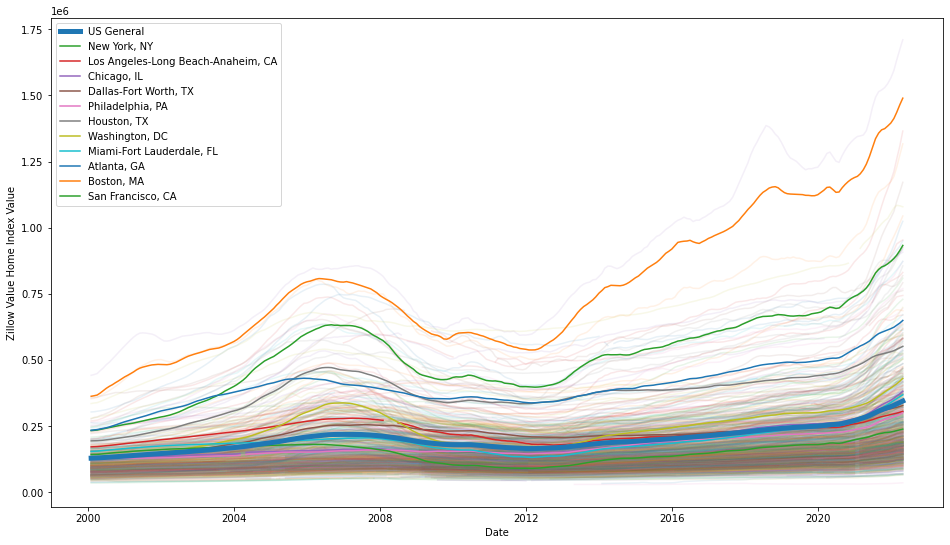

In [71]:
zhviUSGeneral = USGeneralIndex[5:]

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(dates, zhviUSGeneral, label="US General", linewidth = 5, zorder = 50)

topCities = ['New York, NY', 'Los Angeles-Long Beach-Anaheim, CA', 'Chicago, IL', 'Dallas-Fort Worth, TX', 
             'Philadelphia, PA', 'Houston, TX', 'Washington, DC', 'Miami-Fort Lauderdale, FL', 'Atlanta, GA', 
             'Boston, MA', 'San Francisco, CA']

index = 1
for RegionName in data["RegionName"]:
    if RegionName == "Ketchikan, AK":
        break
    currData = data.iloc[index]
    if RegionName in topCities:
        ax.plot(dates, currData[5:], label=RegionName, zorder=10)
    else:
        ax.plot(dates, currData[5:], alpha=0.1)
    index += 1

ax.set_xlabel('Date')
ax.set_ylabel('Zillow Value Home Index Value')
ax.legend()

In [82]:
def zhviGraph(cities):
    fig, ax = plt.subplots(figsize=(16,9))
    
    ax.plot(dates, zhviUSGeneral, label="US General", linewidth = 5)
    
    print(cities)
    
    index = 1
    for RegionName in data["RegionName"]:
        if RegionName in cities:
            currData = data.iloc[index]
            ax.plot(dates, currData[5:], label=RegionName)
        index += 1

    ax.set_xlabel('Date')
    ax.set_ylabel('Zillow Value Home Index Value')
    ax.legend()

Enter a city: new
['New York, NY', 'New Orleans, LA', 'New Haven, CT', 'New London, CT', 'Kennewick, WA', 'New Bern, NC', 'New Philadelphia, OH', 'New Castle, PA', 'New Castle, IN', 'Newport, OR', 'Newberry, SC', 'Newton, IA', 'Newport, TN', 'New Ulm, MN']


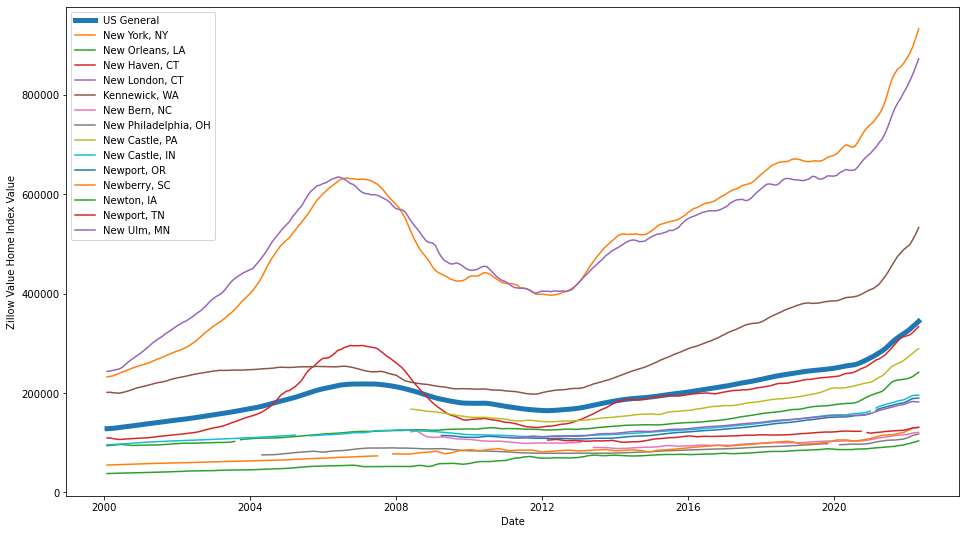

In [85]:
city_chosen = input("Enter a city: ")

cities = []

for RegionName in data["RegionName"]:
    if city_chosen.lower() in RegionName.lower():
        cities.append(RegionName)
        
zhviGraph(cities)